# Ass4 Reproducibility miniproject
Cloned repo from [zhixuhao's](https://github.com/zhixuhao) implementation of [unet](https://github.com/jgu13/unet)

In [5]:
# Uncomment if not yet cloned repo
!if [ -d 'unet' ]; then rm -r unet; fi
!git clone https://github.com/jgu13/unet

Cloning into 'unet'...
remote: Enumerating objects: 953, done.
remote: Counting objects: 100% (556/556), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 953 (delta 145), reused 554 (delta 143), pack-reused 397
Receiving objects: 100% (953/953), 118.46 MiB | 36.80 MiB/s, done.
Resolving deltas: 100% (227/227), done.


In [6]:
import numpy as np
from unet.data import *
from unet.model import *
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Experiment1: Segmentation of neuronal structures in electron microscopic recordings

The training data is a set of
30 images (512x512 pixels) from serial section transmission electron microscopy
of the Drosophila first instar larva ventral nerve cord (VNC). Each image comes with a corresponding fully annotated ground truth segmentation map for cells
(white) and membranes (black).

## Load train, test images, and apply image augmentation

In [7]:
train_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'train')
test_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'test')

#image augmentation parameters passed to image generator as a dict. 
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

train_gen = trainGenerator(2,train_path,'image','label',data_gen_args,save_to_dir = None)
testGen = testGenerator(test_path)


## Build and fit a unet model 
The model is trained for 5 epochs.

Accuracy close to 96%.

Loss function for the training is basically just a binary crossentropy.

In [ ]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[model_checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
Epoch 1/5
1000/1000 [==============================] - ETA: 0s - loss: 0.2870 - accuracy: 0.8906 
Epoch 1: loss improved from inf to 0.28700, saving model to unet_membrane.hdf5
1000/1000 [==============================] - 12358s 12s/step - loss: 0.2870 - accuracy: 0.8906
Epoch 2/5
 583/1000 [================>.............] - ETA: 1:25:09 - loss: 0.2306 - accuracy: 0.9231

KeyboardInterrupt: ignored

## Test images
Save test results to data/membrane/reproduced_test

In [ ]:
reproduced_test_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'reproduced_test')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_test_path)

testGene = testGenerator(test_path)
model = unet()
model.load_weights("unet_membrane.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult(reproduced_test_path,results)

2022-04-19 22:55:34.967102: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 22:55:35.095037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 22:55:35.095963: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 22:55:35.100052: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

30/30 [==============================] - 11s 99ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

## Helper functions

In [ ]:
# helper function for data visualization
def visualize(image_paths, cmap=None):
    """PLot images in one row."""
    n = len(image_paths)
    plt.figure(figsize=(16, 5))
    for i, (name, image_path) in enumerate(image_paths.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        # plt.title(' '.join(name.split('_')).title())
        plt.title(name)
        image=mpimg.imread(image_path)
        plt.imshow(image, cmap=cmap)
    plt.show()

## Visualize image augmentation
Save augmented images to data/membrane/train/reproduced_aug.
Note that masks are augmented together with images.

Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.


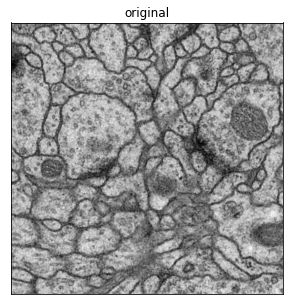

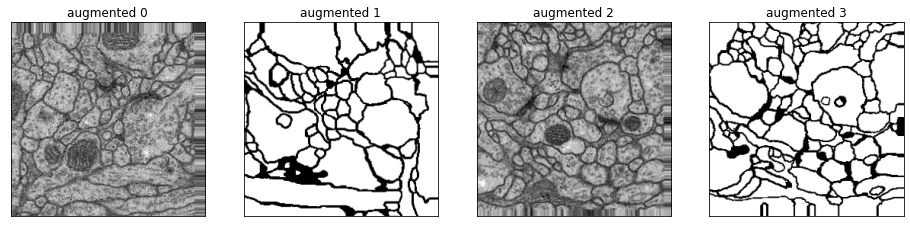

In [ ]:
reproduced_aug_path = os.path.join(os.getcwd(), 'unet', 'data', 'membrane', 'train', 'reproduced_aug')
if not os.path.isdir(reproduced_test_path):
  os.makedirs(reproduced_aug_path)

myGen = trainGenerator(20, train_path,'image','label',data_gen_args,save_to_dir = reproduced_aug_path)
#you will see 60 transformed images and their masks in data/membrane/train/reproduced_aug
num_batch = 3
for i,batch in enumerate(myGen):
    if(i >= num_batch):
        break

orig_image_path = os.path.join(train_path, 'image', '0.png')
aug_image_paths = [os.path.join(reproduced_aug_path, name) for name in os.listdir(reproduced_aug_path)[:4]]
aug_image_names = ['augmented '+str(i) for i in range(len(aug_image_paths))]
orig_image_paths_dict = {'original': orig_image_path}
aug_image_paths_dict = {aug_image_names[i] : aug_image_paths[i] for i in range(len(aug_image_names))}

visualize(orig_image_paths_dict, cmap='gray')
visualize(aug_image_paths_dict, cmap='gray')


## Visualize segmentation results

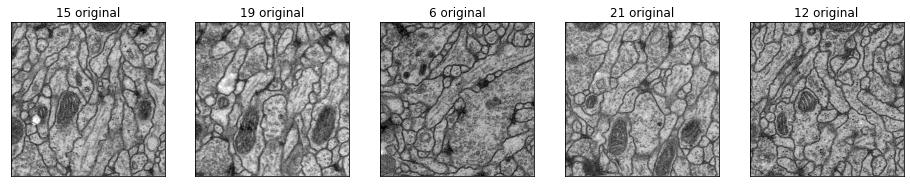

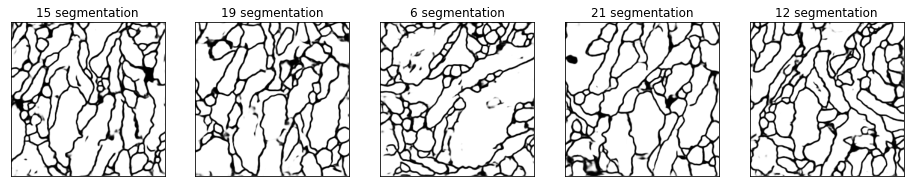

In [ ]:
# display segmentation results of 5 membrane pictures  
np.random.seed(1234) # reset the seed every time before generating random int
selected = np.random.randint(low=0, high=29, size=5)
image_orig_paths = [os.path.join(test_path, str(i)+'.png') for i in selected]
image_orig_names = [str(i)+' original' for i in selected]
image_seg_paths = [os.path.join(reproduced_test_path, str(i)+'_predict.png') for i in selected]
image_seg_names = [str(i)+' segmentation' for i in selected]

orig_image_paths = {image_orig_names[i] : image_orig_paths[i] for i in range(len(image_orig_names))}
seg_image_paths = {image_seg_names[i] : image_seg_paths[i] for i in range(len(image_seg_names))}
visualize(orig_image_paths, cmap='gray')
visualize(seg_image_paths, cmap='gray')

#Experiment2: 
The paper also applied the u-net to a cell segmentation task in light microscopic images. This segmenation task is part of the ISBI cell tracking challenge 2014 and 2015.
Here we performed experiments on the second data set “DIC-HeLa”3. These are HeLa cells on a flat glass recorded by differential interference contrast (DIC) microscopy.

## Effects of hyperparameters on model performance

## Ablation study
1. Remove concatnation
2. No expansive path

In [9]:
# Remove concatenation
no_concat_model = unet(concate=False)
# Train modified model
no_concat_model_checkpoint = ModelCheckpoint('no_concate_unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
no_concat_model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[no_concat_model_checkpoint])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 conv2d_36 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_38 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


10/10 [==============================] - ETA: 0s - loss: 0.7334 - accuracy: 0.7004 
Epoch 1: loss improved from inf to 0.73340, saving model to no_concate_unet_membrane.hdf5
10/10 [==============================] - 105s 10s/step - loss: 0.7334 - accuracy: 0.7004


In [11]:
# Remove expansive paths
no_exp_path_model = unet(expansive_path=False)
# Train modified model
no_exp_path_model_checkpoint = ModelCheckpoint('no_exp_path_unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
no_exp_path_model.fit_generator(train_gen,steps_per_epoch=1000,epochs=5,callbacks=[no_exp_path_model_checkpoint])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_70 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 conv2d_71 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_73 (Conv2D)          (None, 128, 128, 128)     147584    
                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


10/10 [==============================] - ETA: 0s - loss: 2.1771 - accuracy: 0.6569
Epoch 1: loss improved from inf to 2.17706, saving model to no_exp_path_unet_membrane.hdf5
10/10 [==============================] - 55s 5s/step - loss: 2.1771 - accuracy: 0.6569
